In [1]:
import matplotlib.pyplot as plt
import numpy as np
from flow_policy.stochastic_flow_policy import StochasticFlowPolicy
from flow_policy.plot_stochastic import (
    plot_probability_density_q,
    plot_probability_density_ε,
    plot_probability_density_with_trajectories_q,
    plot_probability_density_with_trajectories_ε,
)

from pydrake.all import (
    CompositeTrajectory,
    PiecewisePolynomial,
    Trajectory,
)

# Set seed
np.random.seed(0)

In [2]:
def demonstration_traj_right() -> Trajectory:
    """
    Returns a trajectory x(t) that is 0 for 0 < t < 0.25, and a sine curve
    for 0.25 < t < 1 that starts at 0 and ends at 0.75.
    """
    piece_1 = PiecewisePolynomial.FirstOrderHold(
        breaks=[0, 0.25],
        samples=[[0, 0]],
    )
    piece_2 = PiecewisePolynomial.CubicWithContinuousSecondDerivatives(
        breaks=[0.25, 0.50, 0.75, 1.0],
        samples=[[0.00, 0.62, 0.70, 0.5]],
        sample_dot_at_start=[[0.0]],
        sample_dot_at_end=[[-0.7]],
    )
    return CompositeTrajectory([piece_1, piece_2])

def demonstration_traj_left() -> Trajectory:
    """
    Returns a trajectory x(t) that is 0 for 0 < t < 0.25, and a sine curve
    for 0.25 < t < 1 that starts at 0 and ends at 0.75.
    """
    piece_1 = PiecewisePolynomial.FirstOrderHold(
        breaks=[0, 0.25],
        samples=[[0, 0]],
    )
    piece_2 = PiecewisePolynomial.CubicWithContinuousSecondDerivatives(
        breaks=[0.25, 0.50, 0.75, 1.0],
        samples=[[0.00, -0.62, -0.70, -0.5]],
        sample_dot_at_start=[[0.0]],
        sample_dot_at_end=[[0.7]],
    )
    return CompositeTrajectory([piece_1, piece_2])

traj_right = demonstration_traj_right()
traj_left = demonstration_traj_left()

## Plot demonstration trajectories

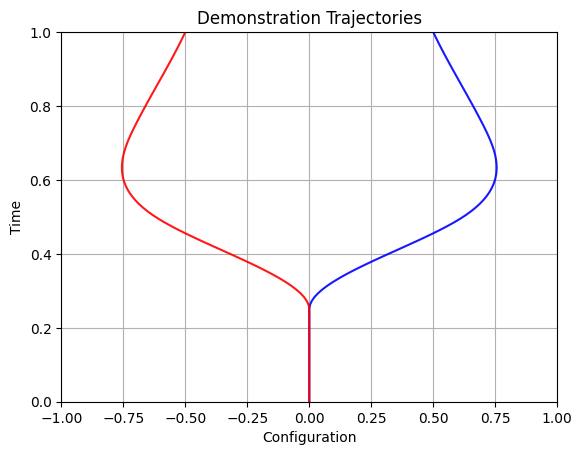

In [3]:
"""
Plot demonstration trajectory on x-y plane where x axis is the state in [-1, 1]
and y axis is the time in [0, 1].
"""
times = np.linspace(0, 1, 100)
plt.plot(traj_right.vector_values(times)[0], times, color='blue', alpha=0.9)
plt.plot(traj_left.vector_values(times)[0], times, color='red', alpha=0.9)
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.xlabel('Configuration')
plt.ylabel('Time')
plt.title('Demonstration Trajectories')
plt.grid(True)
plt.show()

## Conditional flow

In [4]:
fp = StochasticFlowPolicy(trajectories=[traj_right], prior=[1.0], σ0=0.02, σ1=0.05)

## Plot conditional probability path of right trajectory

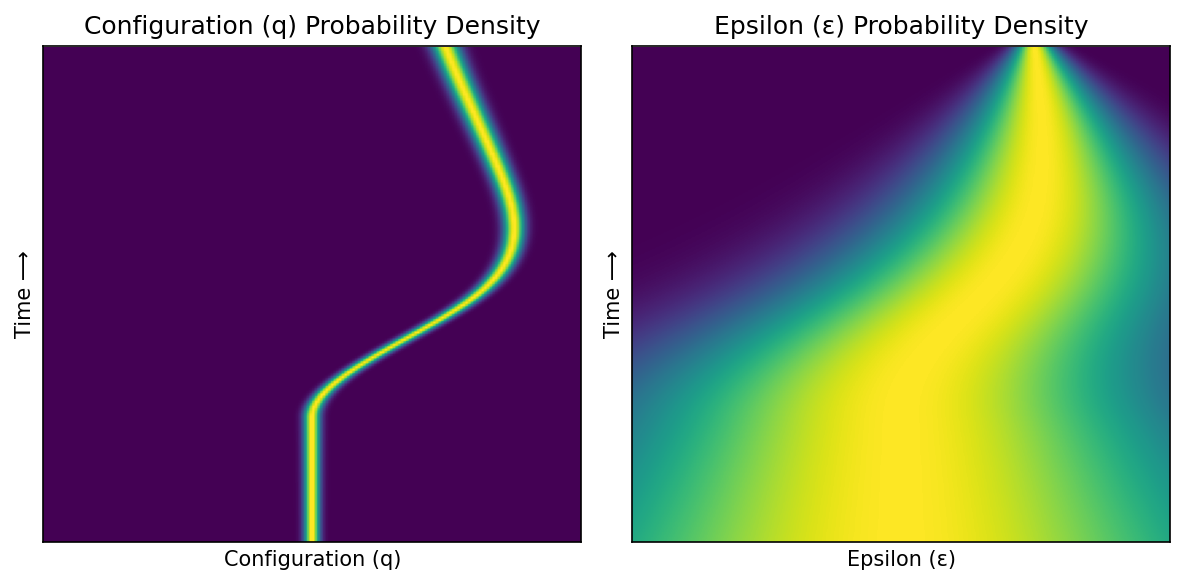

In [5]:
fig = plt.figure(figsize=(8, 4), dpi=150)

xs = np.linspace(-1, 1, 200)
ts = np.linspace(0, 1, 200)

gs = fig.add_gridspec(1, 2, width_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

plot_probability_density_q(fp, ts, xs, ax1)
plot_probability_density_ε(fp, ts, xs, ax2)

ax1.set_title('Configuration (q) Probability Density', size='large')
ax2.set_title('Epsilon (ε) Probability Density', size='large')

ax1.set_xlabel('Configuration (q)')
ax1.set_ylabel('Time ⟶')
ax2.set_xlabel('Epsilon (ε)')
ax2.set_ylabel('Time ⟶')

plt.tight_layout()
plt.show()

## Plot trajectories under conditional flow of right trajectory

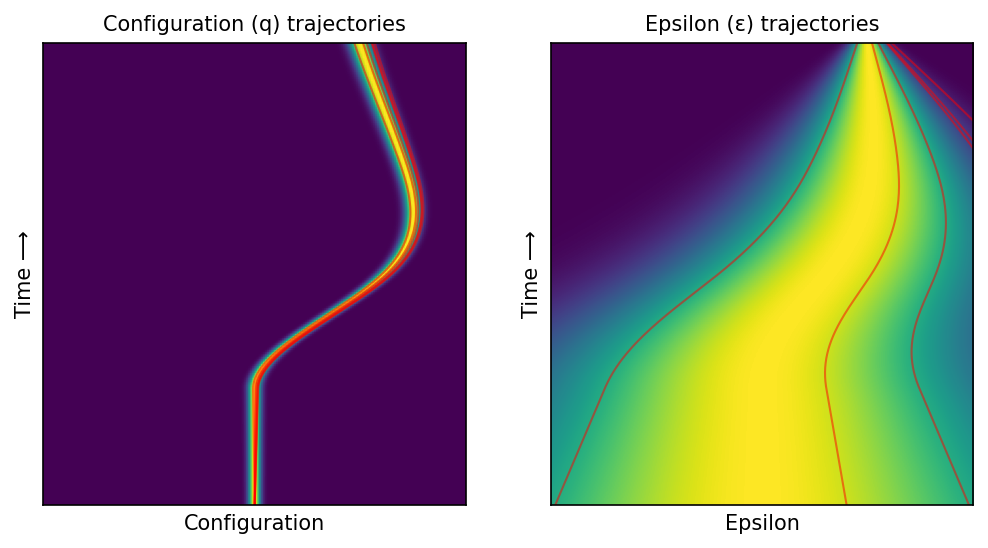

In [6]:
q_starts = [0.0] * 6
ε_starts = np.random.randn(6)

fig = plt.figure(figsize=(8, 4), dpi=150)

gs = fig.add_gridspec(1, 2, width_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

plot_probability_density_with_trajectories_q(fp, ax1, q_starts, ε_starts)
plot_probability_density_with_trajectories_ε(fp, ax2, q_starts, ε_starts)
plt.show()


# Marginal flow

In [7]:
fp = StochasticFlowPolicy(trajectories=[traj_right, traj_left], prior=[0.5, 0.5], σ0=0.02, σ1=0.05)

## Plot marginal probability path

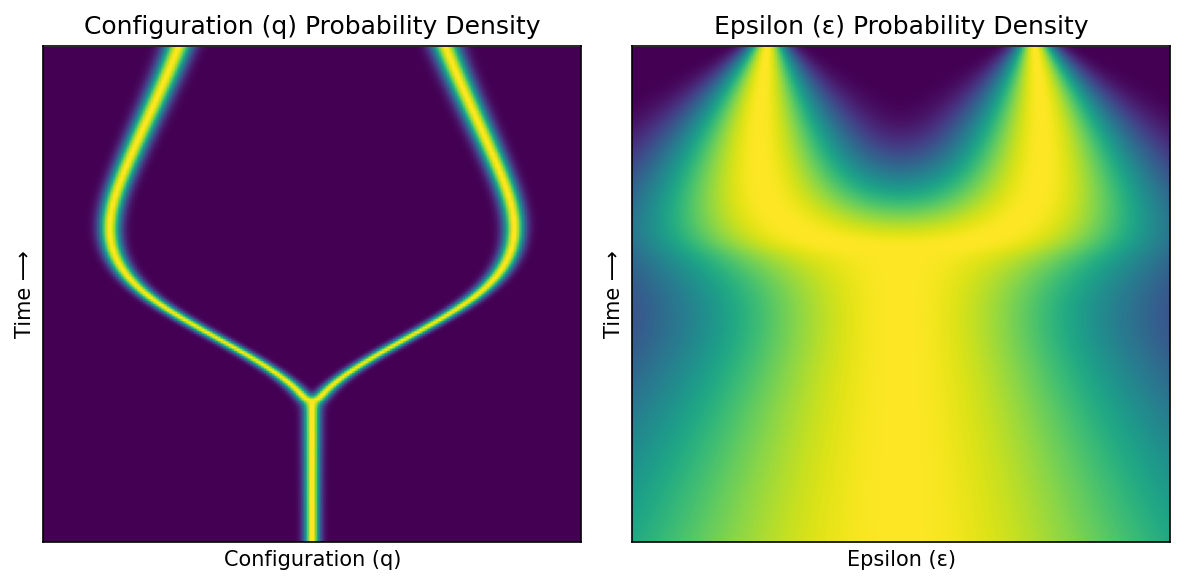

In [8]:
fig = plt.figure(figsize=(8, 4), dpi=150)

xs = np.linspace(-1, 1, 200)
ts = np.linspace(0, 1, 200)

gs = fig.add_gridspec(1, 2, width_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

plot_probability_density_q(fp, ts, xs, ax1)
plot_probability_density_ε(fp, ts, xs, ax2)

ax1.set_title('Configuration (q) Probability Density', size='large')
ax2.set_title('Epsilon (ε) Probability Density', size='large')

ax1.set_xlabel('Configuration (q)')
ax1.set_ylabel('Time ⟶')
ax2.set_xlabel('Epsilon (ε)')
ax2.set_ylabel('Time ⟶')

plt.tight_layout()
plt.show()

## Plot trajectories under marginal flow

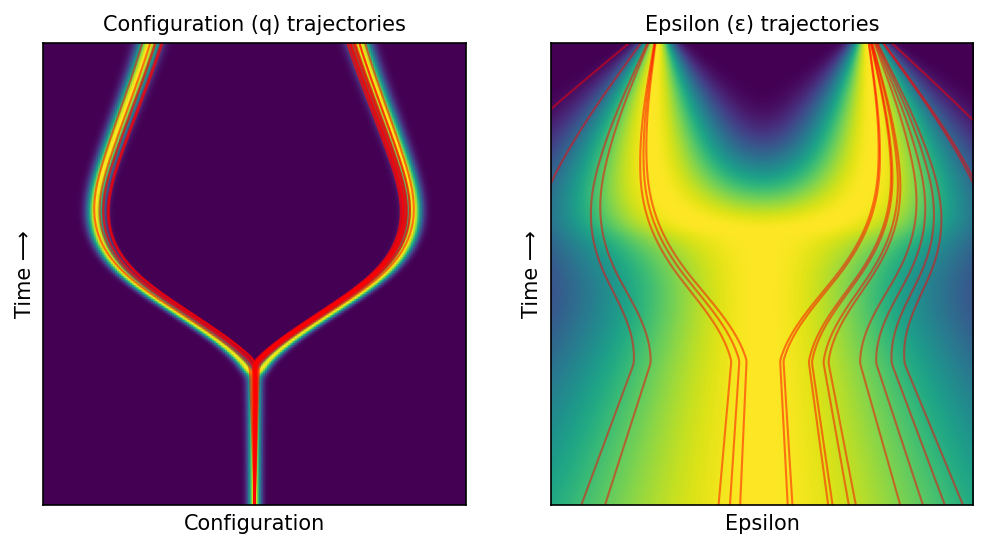

In [9]:
q_starts = [0.0] * 20
ε_starts = np.random.randn(20)

fig = plt.figure(figsize=(8, 4), dpi=150)

gs = fig.add_gridspec(1, 2, width_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

plot_probability_density_with_trajectories_q(fp, ax1, q_starts, ε_starts)
plot_probability_density_with_trajectories_ε(fp, ax2, q_starts, ε_starts)
plt.show()